# 1. Shape Functions Quadratic Lagrange polynomials 

The quadratic Lagrange polynomial add a nodal degree at the midpoint of the element 

!["Quadratic Lagrange"](quad_lagrange.svg)

The local coordinate $x$ is expressed in terls of the isoparametric $\xi \in [1, 1]$ coordinate via
The function is then approximated via quadratic polynomials

$$
u(\xi) = a_0 + a_1 \xi + a_2 \xi^2
$$

## Expressing the polynomial coefficients via the degrees of freedom

To obtain the Lagrange shape functions, the coefficients $a_i$ need to be expressed in terms of the degree of freedom $u_i, \; i \in \{1, 2, 3\}$, corresponding to the nodal values at the extremities $\xi = \pm 1$ and the midpoint $\xi=0$. The following linear system is therefore obtained

$$
\begin{bmatrix}
1 & -1 & 1 \\
1 & 0  & 0 \\
1 & 1  & 1
\end{bmatrix}
\begin{pmatrix}
a_0 \\ a_1 \\ a_2
\end{pmatrix} = 
\begin{pmatrix}
u_1 \\ u_2 \\ u_3
\end{pmatrix}
$$



The inverse of the matrix can be found via this script

In [3]:
import numpy as np

mat = np.array([[1, -1, 1], 
               [1, 0, 0],
               [1, 1, 1]])

inv_mat = np.linalg.inv(mat)

inv_mat

array([[ 0. ,  1. ,  0. ],
       [-0.5,  0. ,  0.5],
       [ 0.5, -1. ,  0.5]])

So the shape function are expressed via

$$
\begin{bmatrix}
N_1 & N_2 & N_3 
\end{bmatrix} = 
\begin{bmatrix}
1 & \xi & \xi^2
\end{bmatrix}
\begin{bmatrix}
0 & 1 & 0 \\
-1/2 & 0 & 1/2 \\
1/2 & -1  & 1/2
\end{bmatrix}
$$
The following Lagrange basis are obtained

\begin{align*}
N_1 &= \frac{\xi(\xi-1)}{2}, \\
N_2 &= 1 - \xi^2, \\
N_3 &= \frac{\xi(\xi+1)}{2}.
\end{align*}

Here's the plot of the shape functions  

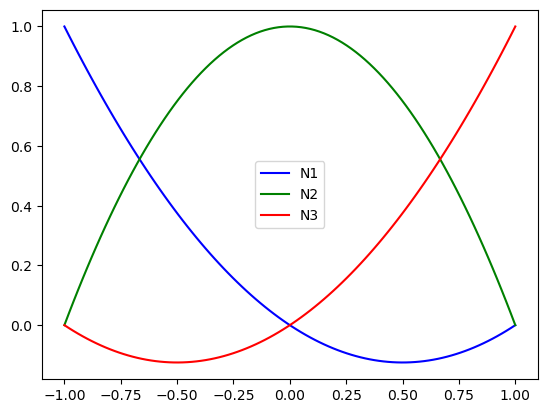

In [9]:
import numpy as np
import matplotlib.pyplot as plt

xi = np.linspace(-1, 1, 100)

N_1 = xi*(xi - 1)/2
N_2 = 1 - xi**2
N_3 = xi*(xi + 1)/2

plt.plot(xi, N_1, 'b', label='N1')
plt.plot(xi, N_2, 'g', label='N2')
plt.plot(xi, N_3, 'r', label='N3')
plt.legend()
plt.show()

## Lagrange basis canonical construction

Given a set of $k+1$ distinct nodes $\{\xi_0, \xi_1, \ldots, \xi_k\}$ the Lagrange basis is the set $\{l_0(\xi), \, l_1(\xi), \, \ldots, l_k(\xi)\}$ of polynomials (each of degree $k$) that satisfy the property
$$
l_j(\xi_m) = \delta_{jm}, \qquad 
\delta_{jm} = \begin{cases} 
0, \quad j \neq m, \\
1, \quad j = m 
\end{cases} 
$$

Given this simple rule, the Lagrange basis can be explicity written as follows

$$
l_j(\xi) = \prod _{\begin{smallmatrix}
0\leq m\leq k\\
m\neq j
\end{smallmatrix}}
{\frac {\xi-\xi_{m}}{\xi_{j}-\xi_{m}}}.
$$

For the quadratic Lagrange polynomial the points are given by $\xi_0 = -1, \xi_1 = 0, \xi_2 = 1$, leading to

\begin{align*}
l_0(\xi) &= \frac{\xi(\xi - 1)}{2}, \\
l_1(\xi) &= 1-\xi^2, \\
l_2(\xi) &= \frac{\xi(\xi + 1)}{2}. \\
\end{align*}

For a generic degree, the Lagrange basis functions can be much more effinctly computed in this way, rather that by the degrees of freedom definition.

# Integration via quadrature rules of the Stiffness and mass matrix

The stiffness matrix is computed via the elastic energy as

$$
E_{\rm el}(u) = \int_{-1}^1 \frac{EA}{2} \left(\frac{du}{dx}\right)^2 \, J \, d\xi = \frac{1}{2} \mathbf{u}^\top \mathbf{K} \mathbf{u}, \qquad
\mathbf{K} = \int_{-1}^1 EA \frac{d\bf{N}^{\top}}{d\xi} \frac{d\bf{N}}{d\xi} J^{-1} d\xi
$$
Since $x={L(\xi + 1)}/{2}$ the jacobian is $J = {L}/{2}$

The mass matrix is computed using the kinetic energy as

$$
E_{\rm cin}(u) = \int_{-1}^1 \frac{\rho A}{2} \dot{u}^2 \, J \, d\xi = \frac{1}{2} \mathbf{u}^\top \mathbf{M} \mathbf{u}, \qquad \mathbf{M} := \int_{-1}^1 \; \rho A\mathbf{N}^{\top} \mathbf{N} \, J \, d\xi
$$

We start by considering the Stiffness matrix. The derivative of the shape functions is given by

$$
\frac{d\mathbf{N}^\top}{d\xi} = \begin{pmatrix}
\xi -\frac{1}{2} \\
- 2 \xi \\
\xi + \frac{1}{2}
\end{pmatrix}
$$

Suppose the cross section varies linearly $A = A_1 \frac{1 - \xi}{2} + A_2 \frac{1 + \xi}{2}$, then the stiffness matrix is given by

$$
\mathbf{K} = \int_{-1}^1 EA \left(A_1 \frac{1 - \xi}{2} + A_2 \frac{1 + \xi}{2}\right) 
\begin{bmatrix}
\xi -\frac{1}{2} \\
- 2 \xi \\
\xi + \frac{1}{2}
\end{bmatrix}
\begin{bmatrix}
\xi -\frac{1}{2} &
- 2 \xi &
\xi + \frac{1}{2}
\end{bmatrix}
\frac{2}{L} d\xi
$$
The integrand is a cubic polynomial (multiplication of a linear with a matrix valued quadratic polynomial). Therefore, for the integration to be exact, it must hold $2n-1 \ge 3$. This means that at least 2 quadrature points are needed.

The mass matrix is instead given by

$$
\mathbf{K} = \int_{-1}^1 EA \left(A_1 \frac{1 - \xi}{2} + A_2 \frac{1 + \xi}{2}\right) 
\begin{bmatrix}
{\xi(\xi - 1)}/{2} \\
1-\xi^2 \\
{\xi(\xi + 1)}/{2} \\
\end{bmatrix}
\begin{bmatrix}
{\xi(\xi - 1)}/{2} &
1-\xi^2 &
{\xi(\xi + 1)}/{2}
\end{bmatrix}
\frac{2}{L} d\xi
$$

The integrand is a quintic polynomial (multiplication of a linear with a matrix valued quartuc polynomial). Therefore, for the integration to be exact, it must hold $2n-1 \ge 5$. This means that at least 3 quadrature points are needed.

If the cross section is constant then the integrand of the stiffness matrix is a quadratic polynomial. For the integration to be exact, two points again needed ($2n-1 \ge 2$). The integrand of the mass matrix is a quartic polynomial and at least 3 points are needed ($2n-1 \ge 4$).